In [30]:
#Vamos a realizar un analisis de los datos con una regresion polinomica
#Veremos que se ajusta mucho mejor que los modelos de regresion lineal

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Tenemos los datos de las temperaturas y las magnetizaciones espontaneas del Gadolinio
temp =np.array([0.030717,0.061433, 0.095563, 0.12628, 0.153584, 0.191126, 0.262799, 0.334471,0.416382,0.505119,0.583618,0.761092,0.860068,0.938567,0.969283,0.986348,0.996587,1.006826])
magn =np.array([1, 0.99962, 0.997342, 0.992141, 0.983143, 0.976689, 0.945822, 0.921371,0.884088,0.836554,0.790311,0.651695,0.560614,0.406811,0.329929,0.213372,0.158282,0.095524])


#Cargamos los datos test con los que los compararemos
df_test = pd.read_csv("curvasj.csv")

#Hagamos las matrices para los datos test:
X_test = np.array(df_test['T'])
y_test1 = np.array(df_test['J=7/2'])
X_test=X_test.reshape(-1,1)

#Los datos de entrenamiento:
X_train=temp.reshape(-1,1)
y_train = magn

In [31]:
from sklearn.preprocessing import PolynomialFeatures

#Definimos la relacion
quadratic = PolynomialFeatures(degree=2)
pr = LinearRegression()

#Transformamos los datos
X_quad = quadratic.fit_transform(X_test)
pr.fit(X_quad, y_test1)
y_quad_fit = pr.predict(quadratic.fit_transform(X_test))
#Los datos test se han transformado a unas predicciones cuadraticas de ellos mismos
#estos son los datos que se comparan a los del gadolinio

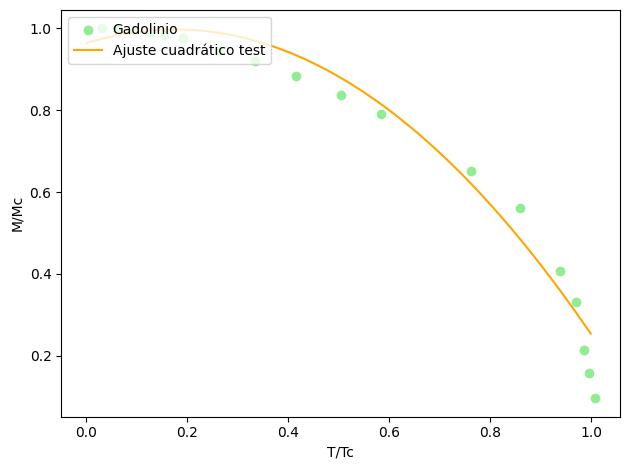

In [32]:
#Representemos los datos
plt.scatter(X_train, y_train, label="Gadolinio", color='lightgreen')
plt.plot(X_test, y_quad_fit, label='Ajuste cuadrático test', color='orange')
plt.xlabel('T/Tc')
plt.ylabel('M/Mc')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()